## natioanl health & nutrition exam. survey 
- 2005 - 2006 code book
- FFQRAW_D.XPT: dietary interview:  total nutrient intake, first day
https://wwwn.cdc.gov/Nchs/Nhanes/2005-2006/DR1TOT_D.htm#DR1TCAFF

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# open
ff = pd.read_sas('resources/DR1TOT_D.XPT')
ff.head()

/Users/yinglin/opt/anaconda3/envs/pythondata/lib/python3.9/site-packages/pandas/io/sas/sas_xport.py:475: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[x] = v


,SEQN,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DAY,DR1LANG,DR1MNRSP,...,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ,DRD370V
0,31127.0,4718.873252,5906.472362,1.0,57.0,2.0,2.0,7.0,1.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31128.0,3933.789046,4250.890435,1.0,16.0,2.0,2.0,6.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,31129.0,26719.805504,26719.805504,1.0,10.0,2.0,2.0,2.0,1.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
3,31130.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,31131.0,13595.895940,14822.479326,1.0,16.0,2.0,2.0,6.0,1.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0


In [3]:
ff.columns

Index(['SEQN', 'WTDRD1', 'WTDR2D', 'DR1DRSTZ', 'DR1EXMER', 'DRABF', 'DRDINT',
       'DR1DAY', 'DR1LANG', 'DR1MNRSP',
       ...
       'DRD370QQ', 'DRD370R', 'DRD370RQ', 'DRD370S', 'DRD370SQ', 'DRD370T',
       'DRD370TQ', 'DRD370U', 'DRD370UQ', 'DRD370V'],
      dtype='object', length=160)

### col of int.
SEQN - Respondent sequence number

DR1DRSTZ - Dietary recall status

DRQSDT4 - Sugar free/Low sugar diet

DR1TKCAL - Energy (kcal)

DR1TPROT - Protein (gm)

DR1TCARB - Carbohydrate (gm)

DR1TSUGR - Total sugars (gm)

DR1TFIBE - Dietary fiber (gm)

DR1TTFAT - Total fat (gm)

DR1TSFAT - Total saturated fatty acids (gm)

DR1TCAFF - Caffeine (mg)

In [4]:
# df with col. of int. 
ff = ff.loc[:, ['SEQN', 'DR1DRSTZ', 'DRQSDT4', 'DR1TKCAL', 'DR1TPROT', 'DR1TCARB',
                'DR1TSUGR','DR1TFIBE', 'DR1TTFAT','DR1TSFAT', 'DR1TCAFF'
                ]]
ff.head()

,SEQN,DR1DRSTZ,DRQSDT4,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TCAFF
0,31127.0,1.0,NaN,1421.0,50.42,171.45,139.02,4.6,61.28,25.994,5.397605e-79
1,31128.0,1.0,NaN,1402.0,32.51,180.88,88.69,10.0,65.05,23.381,3.300000e+01
2,31129.0,1.0,NaN,4110.0,139.89,684.22,498.82,14.5,94.73,38.599,7.000000e+00
3,31130.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,31131.0,1.0,NaN,1458.0,27.43,233.73,146.01,6.4,50.86,18.274,1.300000e+01


In [5]:
len(ff)

9950

In [6]:
# rename col.
ff_1 = ff.rename(columns={
                     'SEQN': 'Respondent sequence number',
                     'DR1DRSTZ':'Dietary recall status',
                     'DRQSDT4': 'Sugar free/Low sugar diet',
                     'DR1TKCAL': 'Energy (kcal)',
                     'DR1TPROT' :'Protein (gm)',
                     'DR1TCARB': 'Carbohydrate (gm)',
                     'DR1TSUGR':'Total sugars (gm)',
                     'DR1TFIBE':'Dietary fiber (gm)',
                     'DR1TTFAT': 'Total fat (gm)',
                     'DR1TSFAT': 'Total saturated fatty acids (gm)',
                     'DR1TCAFF': 'Caffeine (mg)'})
ff_1.head()


,Respondent sequence number,Dietary recall status,Sugar free/Low sugar diet,Energy (kcal),Protein (gm),Carbohydrate (gm),Total sugars (gm),Dietary fiber (gm),Total fat (gm),Total saturated fatty acids (gm),Caffeine (mg)
0,31127.0,1.0,NaN,1421.0,50.42,171.45,139.02,4.6,61.28,25.994,5.397605e-79
1,31128.0,1.0,NaN,1402.0,32.51,180.88,88.69,10.0,65.05,23.381,3.300000e+01
2,31129.0,1.0,NaN,4110.0,139.89,684.22,498.82,14.5,94.73,38.599,7.000000e+00
3,31130.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,31131.0,1.0,NaN,1458.0,27.43,233.73,146.01,6.4,50.86,18.274,1.300000e+01


---
## Energy


In [13]:
ff_1['Energy (kcal)'].unique()

array([1421., 1402., 4110., ..., 2881., 2209., 3207.])

In [12]:
ff_1['Energy (kcal)'].value_counts()

1456.0    13
1864.0    12
1934.0    11
1583.0    11
1514.0    11
          ..
282.0      1
541.0      1
486.0      1
4479.0     1
3207.0     1
Name: Energy (kcal), Length: 3288, dtype: int64

---
## sugar free/low sugar diet
- the type the diet they are on 
- not important 

In [9]:
ff_1['Sugar free/Low sugar diet'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Sugar free/Low sugar diet, dtype: float64

In [10]:
ff_1['Sugar free/Low sugar diet'].unique()

array([nan,  4.])

In [11]:
ff_1['Sugar free/Low sugar diet'].value_counts()
# 4:  sugar free or low sugar diet 
# NaN: missing 

4.0    67
Name: Sugar free/Low sugar diet, dtype: int64

- only 67 people are on the sugar free/low sugar diet
- 9947 are missing

---
### seaborn correlation

In [17]:
ff_1.columns

Index(['Respondent sequence number', 'Dietary recall status',
       'Sugar free/Low sugar diet', 'Energy (kcal)', 'Protein (gm)',
       'Carbohydrate (gm)', 'Total sugars (gm)', 'Dietary fiber (gm)',
       'Total fat (gm)', 'Total saturated fatty acids (gm)', 'Caffeine (mg)'],
      dtype='object')

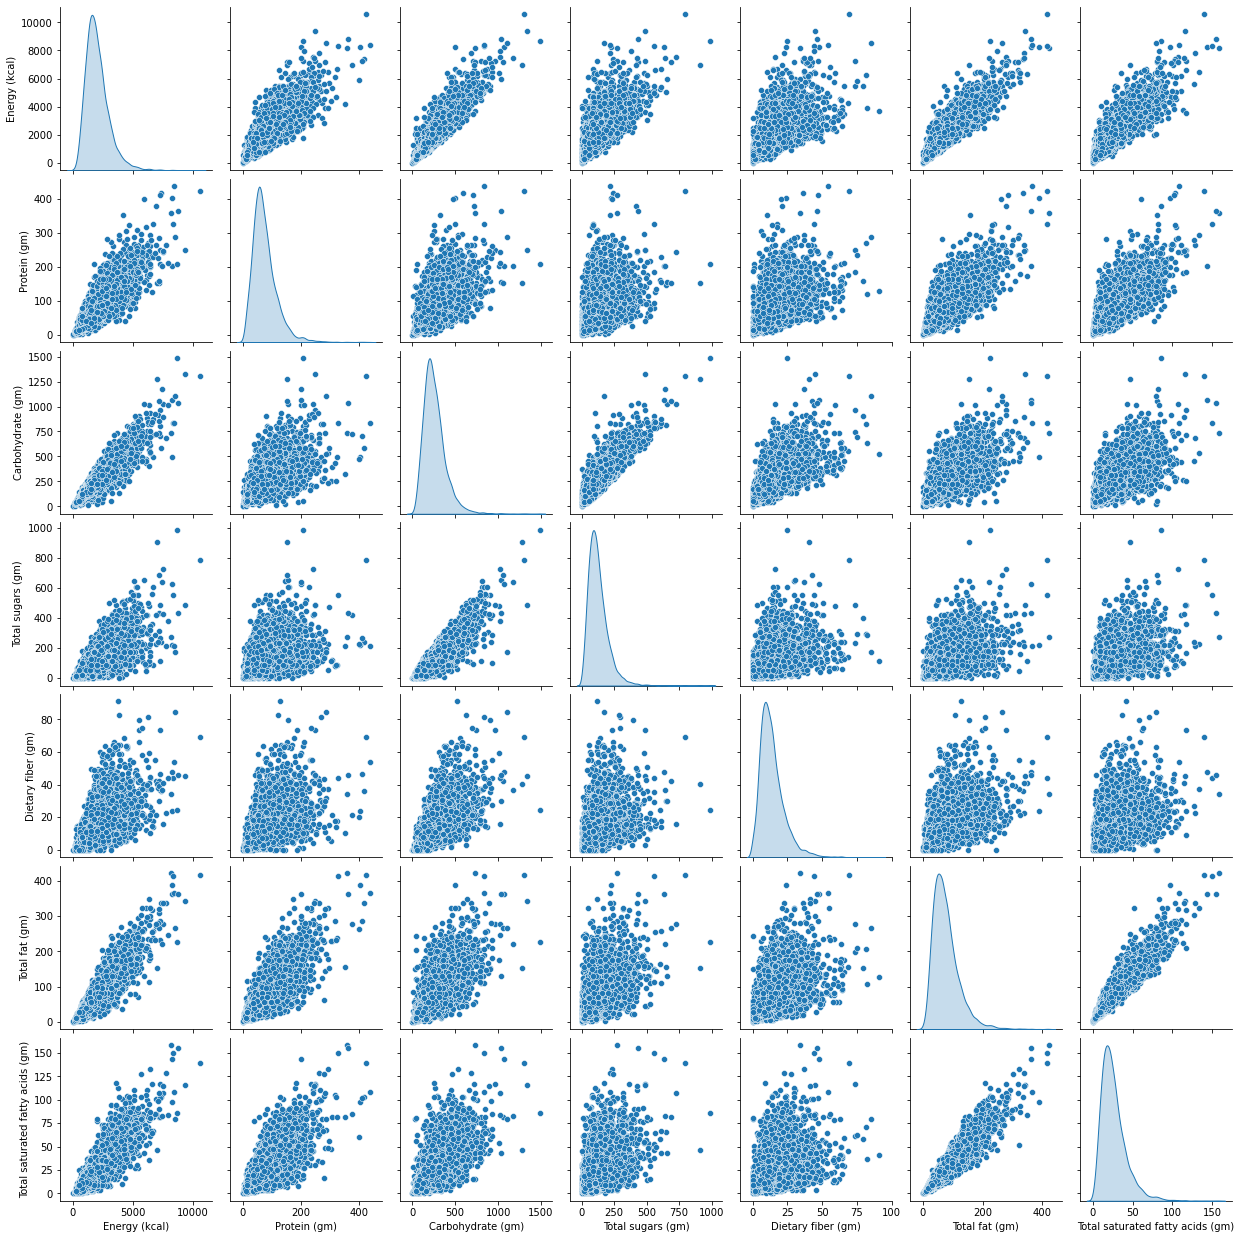

In [23]:
sns.pairplot(ff_1[['Energy (kcal)', 'Protein (gm)', 'Carbohydrate (gm)',
                   'Total sugars (gm)', 'Dietary fiber (gm)', 'Total fat (gm)',
                   'Total saturated fatty acids (gm)']],
                   diag_kind='kde')